Learned Index Visualization Module
===============================================================================
This module will generate visualizations in order to illustrate the accuracy
of our implemented learned index structure.

In [1]:
## This section will contain all the nessecary imports for the notebook

import sys, os

# Allow for absolute imported paths
project_root = project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
os.path.abspath
if project_root not in sys.path:
    sys.path.append(project_root)

import matplotlib.pyplot as plt
import numpy as np
from src.indexes.learned_index import LearnedIndex
from src.utils.data_loader import DatasetGenerator

In [2]:
# Constants to be used throughout the notebook

# Same size for the datasets to keep consistency
DATASET_SIZE = 100_000

## This section will be regarding the uniform dataset

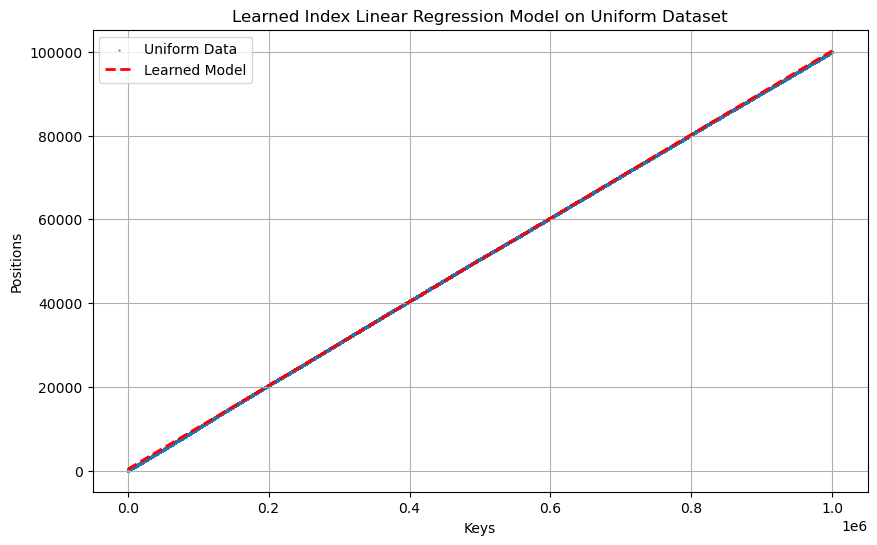

In [3]:
def plot_uniform():
    # Get the data from our loader
    data_loader_uniform = DatasetGenerator.generate_uniform(DATASET_SIZE)

    # Build our learned index that has been created
    learned_index_uniform = LearnedIndex()
    learned_index_uniform.build_from_sorted_array(data_loader_uniform)

    # Plot the dataset points with the learned index
    plt.figure(figsize=(10, 6))
    plt.scatter(data_loader_uniform, np.arange(len(data_loader_uniform)), s=1, label='Uniform Data', alpha=0.5)
    predicted_positions = learned_index_uniform.a * data_loader_uniform + learned_index_uniform.b
    plt.plot(data_loader_uniform, predicted_positions, color='red', label='Learned Model', linewidth=2, linestyle='--')
    plt.title('Learned Index Linear Regression Model on Uniform Dataset')
    plt.xlabel('Keys')
    plt.ylabel('Positions')
    plt.legend()
    plt.grid()
    plt.show()
plot_uniform()

### Results from the uniform dataset:
The learned model is able to accurately predict the positions of the keys in the uniform dataset. The uniform dataset contains randomly distributed keys across the range 0 to 1,000,000, which creates a generally linear relationship between keys and positions.

## This section will be regarding the sequential dataset

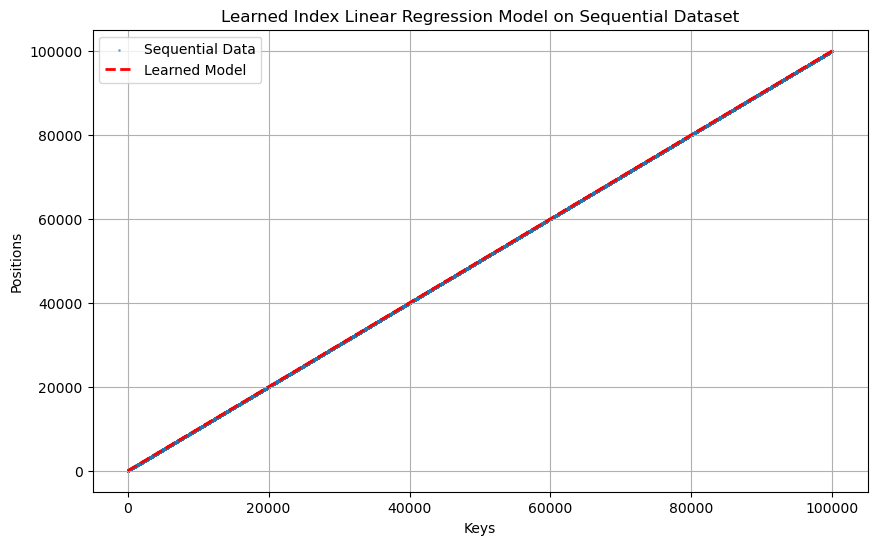

In [4]:
def plot_sequential():
    # Generate the sequential dataset
    data_loader_sequential = DatasetGenerator.generate_sequential(DATASET_SIZE)

    # Build our learned index that has been created
    learned_index_sequential = LearnedIndex()
    learned_index_sequential.build_from_sorted_array(data_loader_sequential)
    # Plot the dataset points with the learned index
    plt.figure(figsize=(10, 6))
    plt.scatter(data_loader_sequential, np.arange(len(data_loader_sequential)), s=1, label='Sequential Data', alpha=0.5)
    predicted_positions = learned_index_sequential.a * data_loader_sequential + learned_index_sequential.b
    plt.plot(data_loader_sequential, predicted_positions, color='red', label='Learned Model', linewidth=2, linestyle='--')
    plt.title('Learned Index Linear Regression Model on Sequential Dataset')
    plt.xlabel('Keys')
    plt.ylabel('Positions')
    plt.legend()
    plt.grid()
    plt.show()
plot_sequential()

### Results from the sequential dataset:

The learned index fits the sequential data almost perfectly. The sequential dataset contains keys 0, 1, 2, 3, ..., 99,999 - perfectly evenly spaced values. This creates an ideal linear relationship (slope ≈ 1.0) between keys and positions, resulting in near-zero prediction error.

## This section will be regarding the mixed dataset

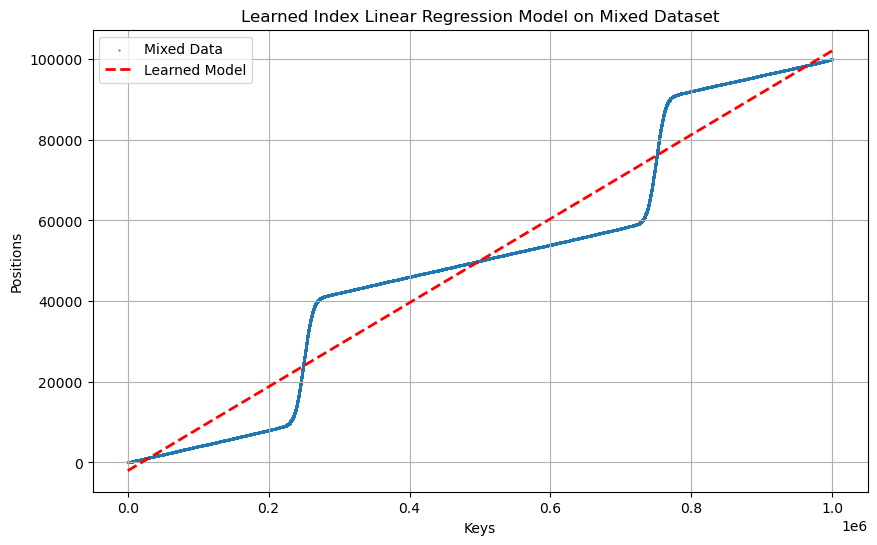

In [5]:
def plot_mixed():
    # Generate the mixed dataset
    data_loader_mixed = DatasetGenerator.generate_mixed(DATASET_SIZE)

    # Build our learned index that has been created
    learned_index_mixed = LearnedIndex()
    learned_index_mixed.build_from_sorted_array(data_loader_mixed)

    # Plot the dataset points with the learned index
    plt.figure(figsize=(10, 6))
    plt.scatter(data_loader_mixed, np.arange(len(data_loader_mixed)), s=1, label='Mixed Data', alpha=0.5)
    
    predicted_positions = learned_index_mixed.a * data_loader_mixed + learned_index_mixed.b
    plt.plot(data_loader_mixed, predicted_positions, color='red', label='Learned Model', linewidth=2, linestyle='--')
    plt.title('Learned Index Linear Regression Model on Mixed Dataset')
    plt.xlabel('Keys')
    plt.ylabel('Positions')
    plt.legend()
    plt.grid()
    plt.show()
plot_mixed()

### Results from the mixed dataset:

The learned index does not fit the mixed data well. The mixed dataset has a non-linear, clustered distribution with two normal distributions centered at different points. A single linear model cannot accurately capture this complex pattern, resulting in larger prediction errors.

## This section will plot all three datasets together to show the distribution

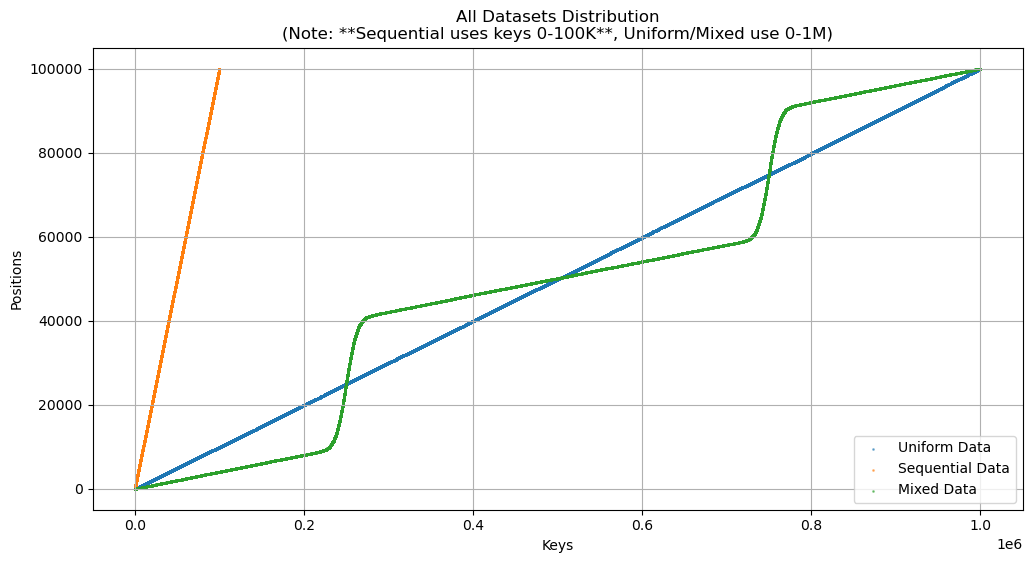


Dataset Key Ranges:
Sequential: 0 to 99999
Uniform:    12 to 999992
Mixed:      8 to 999912


In [6]:
# plot all three datasets together to show the distribution
def plot_all_datasets():
    # Generate all three datasets
    uniform_data = DatasetGenerator.generate_uniform(DATASET_SIZE)
    sequential_data = DatasetGenerator.generate_sequential(DATASET_SIZE)
    mixed_data = DatasetGenerator.generate_mixed(DATASET_SIZE)

    plt.figure(figsize=(12, 6))
    plt.scatter(uniform_data, np.arange(len(uniform_data)), s=1, label='Uniform Data', alpha=0.5)
    plt.scatter(sequential_data, np.arange(len(sequential_data)), s=1, label='Sequential Data', alpha=0.5)
    plt.scatter(mixed_data, np.arange(len(mixed_data)), s=1, label='Mixed Data', alpha=0.5)

    plt.title('All Datasets Distribution\n(Note: **Sequential uses keys 0-100K**, Uniform/Mixed use 0-1M)')
    plt.xlabel('Keys')
    plt.ylabel('Positions')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Print the stats
    print("\nDataset Key Ranges:")
    print(f"Sequential: {sequential_data.min():.0f} to {sequential_data.max():.0f}")
    print(f"Uniform:    {uniform_data.min():.0f} to {uniform_data.max():.0f}")
    print(f"Mixed:      {mixed_data.min():.0f} to {mixed_data.max():.0f}")
    
plot_all_datasets()

## This section will go over the accuracy and error rate of the Learned Index Model

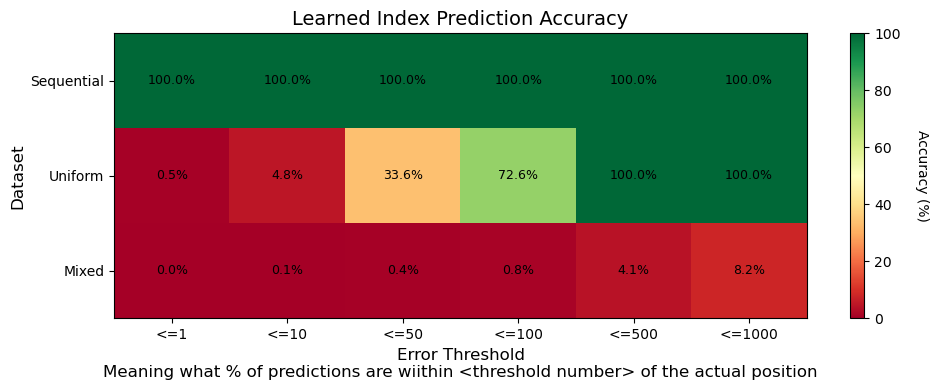

In [7]:
def heatmap():
    # Data
    datasets = {
        'Sequential': DatasetGenerator.generate_sequential(DATASET_SIZE),
        'Uniform': DatasetGenerator.generate_uniform(DATASET_SIZE),
        'Mixed': DatasetGenerator.generate_mixed(DATASET_SIZE)
    }

    thresholds = [1, 10, 50, 100, 500, 1000]

    # Build the matrix
    matrix = np.zeros((len(datasets), len(thresholds)))

    for i, (name, data) in enumerate(datasets.items()):

        # Build the index
        learned_index = LearnedIndex()
        learned_index.build_from_sorted_array(data)

        # Call the predict function from our index
        predicted_positions = learned_index.a * data + learned_index.b
        # Now we can calc the errorr
        errors = np.abs(predicted_positions - np.arange(len(data)))
        for j, threshold in enumerate(thresholds):
            accuracy = np.sum(errors <= threshold) / len(data) * 100
            matrix[i, j] = accuracy

    # Generate the heatmap now that we have the data
    fig, ax = plt.subplots(figsize=(10, 4))
    image = ax.imshow(matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)

    # Set ticks and labels
    ax.set_xticks(np.arange(len(thresholds)))
    ax.set_yticks(np.arange(len(datasets)))
    ax.set_xticklabels([f'<={t}' for t in thresholds])
    ax.set_yticklabels(datasets.keys())
    
    # Add text annotations
    for i in range(len(datasets)):
        for j in range(len(thresholds)):
            text = ax.text(j, i, f'{matrix[i, j]:.1f}%',
                          ha="center", va="center", color="black", fontsize=9)
    
    ax.set_xlabel('Error Threshold\nMeaning what % of predictions are wiithin <threshold number> of the actual position', fontsize=12)
    ax.set_ylabel('Dataset', fontsize=12)
    ax.set_title('Learned Index Prediction Accuracy', fontsize=14)
    
    # Add colorbar
    cbar = plt.colorbar(image, ax=ax)
    cbar.set_label('Accuracy (%)', rotation=270, labelpad=20)
    
    plt.tight_layout()
    plt.show()

heatmap()